<a href="https://colab.research.google.com/github/LabsVelns/Machine-learning-CaseStudy/blob/main/Studies_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#CONTENT

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from the Canada Government's official open data website. This is a compiled version. This contains data over a period of 7 years.

There is a total of 26075 rows and 15 columns. There are a few abbreviations that have been used to describe the features. I am listing them out here. The same can be found in the Data Description sheet.

##Model

4WD/4X4 = Four-wheel drive

AWD = All-wheel drive

FFV = Flexible-fuel vehicle

SWB = Short wheelbase

LWB = Long wheelbase

EWB = Extended wheelbase

##Transmission

A = Automatic

AM = Automated manual

AS = Automatic with select shift

AV = Continuously variable

M = Manual

3 - 10 = Number of gears

##Fuel type

X = Regular gasoline

Z = Premium gasoline

D = Diesel

E = Ethanol (E85)

N = Natural gas

##Fuel Consumption

City and highway fuel consumption ratings are shown in liters per 100 kilometers (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

##CO2 Emissions

The tailpipe emissions of carbon dioxide (in grams per kilometer) for combined city and highway driving

##Smog Rating

The tailpipe emissions of smog-forming pollutants are rated on a scale from 1 (worst) to 10 (best)

##ACKNOWLEDGEMENTS

The data has been taken and compiled from the below Canada Government official link -
"https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6"

#QUESTIONS

Determine or test the influence of different variables on the emission of CO2 and the smog ratings.

What are the influencing features that affect CO2 emission and smog ratings the most?

Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

DATASET: https://www.kaggle.com/datasets/abhikdas2809/canadacaremissions/download?datasetVersionNumber=3


In [ ]:
#!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
#!pip install pandas-profiling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab/Case Exams/CanadaCarEmissions.xlsx')
df

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
0             NaN    NaN                           NaN            NaN   
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
0                  NaN        NaN          NaN       NaN   
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
0                                NaN                           NaN   
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
0                  NaN         NaN                   NaN         NaN   
1                 10.1        28.0                 232.0         NaN   
2                  9.8        29.0                 225.0         NaN   
3                  9.7        29.0                 223.0         NaN   
4                 12.5        23.0                 288.0         NaN   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0         5.0   
26072              9.4        30.0                 219.0         5.0   
26073              9.9        29.0                 232.0         5.0   
26074             10.1        28.0                 236.0         5.0   
26075             10.8        26.0                 252.0         5.0   

       Smog Rating  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
...            ...  
26071          5.0  
26072          5.0  
26073          7.0  
26074          5.0  
26075          7.0  

[26076 rows x 15 columns]

In [ ]:
df[df['Smog Rating']!=np.nan].groupby(['Smog Rating'])['CO2 Rating'].value_counts()

Smog Rating  CO2 Rating
1.0          3.0           115
             5.0           105
             4.0           102
             2.0            97
             1.0            41
             6.0            11
             7.0             6
2.0          1.0             4
             2.0             3
3.0          3.0           532
             4.0           364
             5.0           298
             2.0           154
             6.0           118
             7.0            95
             1.0            57
             8.0            28
             9.0             2
             10.0            1
5.0          4.0           598
             5.0           543
             3.0           340
             6.0           185
             7.0            61
             2.0            58
             8.0            26
             1.0            18
             9.0             4
             10.0            1
6.0          5.0           344
             4.0           232
             3.

## Data PreProcessing

In [ ]:
df.isnull().sum()

MODEL YEAR                           1
MAKE                                 1
MODEL(# = high output engine)        1
VEHICLE CLASS                        1
ENGINE SIZE (L)                      1
CYLINDERS                            1
TRANSMISSION                         1
FUEL TYPE                            1
FUEL CONSUMPTION CITY (L/100)        1
FUEL CONSUMPTION HWY (L/100)         1
COMB (L/100 km)                      1
COMB (mpg)                           1
CO2 EMISSIONS (g/km)                 1
CO2 Rating                       18905
Smog Rating                      20015
dtype: int64

###Total Percentage of Null Values from Dataset

In [ ]:
df.isnull().sum()/df.shape[0]*100

MODEL YEAR                        0.003835
MAKE                              0.003835
MODEL(# = high output engine)     0.003835
VEHICLE CLASS                     0.003835
ENGINE SIZE (L)                   0.003835
CYLINDERS                         0.003835
TRANSMISSION                      0.003835
FUEL TYPE                         0.003835
FUEL CONSUMPTION CITY (L/100)     0.003835
FUEL CONSUMPTION HWY (L/100)      0.003835
COMB (L/100 km)                   0.003835
COMB (mpg)                        0.003835
CO2 EMISSIONS (g/km)              0.003835
CO2 Rating                       72.499617
Smog Rating                      76.756404
dtype: float64

In [ ]:
df = df.drop([0],axis = 0)
df

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
5          1995.0  ACURA                  LEGEND COUPE        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
5                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
5                               14.6                          11.0   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
1                 10.1        28.0                 232.0         NaN   
2                  9.8        29.0                 225.0         NaN   
3                  9.7        29.0                 223.0         NaN   
4                 12.5        23.0                 288.0         NaN   
5                 13.0        22.0                 299.0         NaN   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0         5.0   
26072              9.4        30.0                 219.0         5.0   
26073              9.9        29.0                 232.0         5.0   
26074             10.1        28.0                 236.0         5.0   
26075             10.8        26.0                 252.0         5.0   

       Smog Rating  
1              NaN  
2              NaN  
3              NaN  
4              NaN  
5              NaN  
...            ...  
26071          5.0  
26072          5.0  
26073          7.0  
26074          5.0  
26075          7.0  

[26075 rows x 15 columns]

In [ ]:
for i in range(len(df['CO2 EMISSIONS (g/km)'])):
  if df['CO2 EMISSIONS (g/km)'].iloc[i] > 600:
    df['Smog Rating'].iloc[i] = 1
  elif (500<df['CO2 EMISSIONS (g/km)'].iloc[i]<=600) :
    df['Smog Rating'].iloc[i] = 2
  elif (400<df['CO2 EMISSIONS (g/km)'].iloc[i]<=500) :
    df['Smog Rating'].iloc[i] = 3
  elif (300<df['CO2 EMISSIONS (g/km)'].iloc[i]<=400) :
    df['Smog Rating'].iloc[i] = 4
  elif (200<df['CO2 EMISSIONS (g/km)'].iloc[i]<=300) :
    df['Smog Rating'].iloc[i] = 5
  elif (150<df['CO2 EMISSIONS (g/km)'].iloc[i]<=200) :
    df['Smog Rating'].iloc[i] = 6
  elif (100<df['CO2 EMISSIONS (g/km)'].iloc[i]<=150) :
    df['Smog Rating'].iloc[i] = 7
  elif (df['CO2 EMISSIONS (g/km)'].iloc[i]<=100) :
    df['Smog Rating'].iloc[i] = 8


5.0    15307
4.0     5428
6.0     4167
3.0      563
7.0      545
8.0       33
2.0       29
1.0        3
Name: Smog Rating, dtype: int64

In [ ]:
df['Smog Rating'].value_counts()

5.0    15307
4.0     5428
6.0     4167
3.0      563
7.0      545
8.0       33
2.0       29
1.0        3
Name: Smog Rating, dtype: int64

In [ ]:
df_med =  df.fillna(df.median())
df_med

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
5          1995.0  ACURA                  LEGEND COUPE        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
5                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
5                               14.6                          11.0   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
1                 10.1        28.0                 232.0         5.0   
2                  9.8        29.0                 225.0         5.0   
3                  9.7        29.0                 223.0         5.0   
4                 12.5        23.0                 288.0         5.0   
5                 13.0        22.0                 299.0         5.0   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0         5.0   
26072              9.4        30.0                 219.0         5.0   
26073              9.9        29.0                 232.0         5.0   
26074             10.1        28.0                 236.0         5.0   
26075             10.8        26.0                 252.0         5.0   

       Smog Rating  
1              5.0  
2              5.0  
3              5.0  
4              5.0  
5              5.0  
...            ...  
26071          5.0  
26072          5.0  
26073          7.0  
26074          5.0  
26075          7.0  

[26075 rows x 15 columns]

In [ ]:
df_mean = df.fillna(df.mean())
df_mean

MODEL YEAR   MAKE MODEL(# = high output engine)  VEHICLE CLASS  \
1          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
2          1995.0  ACURA                       INTEGRA     SUBCOMPACT   
3          1995.0  ACURA                  INTEGRA GS-R     SUBCOMPACT   
4          1995.0  ACURA                        LEGEND        COMPACT   
5          1995.0  ACURA                  LEGEND COUPE        COMPACT   
...           ...    ...                           ...            ...   
26071      2022.0  Volvo                   XC40 T5 AWD     SUV: Small   
26072      2022.0  Volvo                   XC60 B5 AWD     SUV: Small   
26073      2022.0  Volvo                   XC60 B6 AWD     SUV: Small   
26074      2022.0  Volvo                   XC90 T5 AWD  SUV: Standard   
26075      2022.0  Volvo                   XC90 T6 AWD  SUV: Standard   

       ENGINE SIZE (L)  CYLINDERS TRANSMISSION FUEL TYPE  \
1                  1.8        4.0           A4         X   
2                  1.8        4.0           M5         X   
3                  1.8        4.0           M5         Z   
4                  3.2        6.0           A4         Z   
5                  3.2        6.0           A4         Z   
...                ...        ...          ...       ...   
26071              2.0        4.0          AS8         Z   
26072              2.0        4.0          AS8         Z   
26073              2.0        4.0          AS8         Z   
26074              2.0        4.0          AS8         Z   
26075              2.0        4.0          AS8         Z   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
1                               11.6                           8.3   
2                               11.0                           8.3   
3                               10.8                           8.3   
4                               14.2                          10.5   
5                               14.6                          11.0   
...                              ...                           ...   
26071                           10.7                           7.7   
26072                           10.5                           8.1   
26073                           11.0                           8.7   
26074                           11.5                           8.4   
26075                           12.4                           8.9   

       COMB (L/100 km)  COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
1                 10.1        28.0                 232.0     4.65988   
2                  9.8        29.0                 225.0     4.65988   
3                  9.7        29.0                 223.0     4.65988   
4                 12.5        23.0                 288.0     4.65988   
5                 13.0        22.0                 299.0     4.65988   
...                ...         ...                   ...         ...   
26071              9.4        30.0                 219.0     5.00000   
26072              9.4        30.0                 219.0     5.00000   
26073              9.9        29.0                 232.0     5.00000   
26074             10.1        28.0                 236.0     5.00000   
26075             10.8        26.0                 252.0     5.00000   

       Smog Rating  
1         4.674311  
2         4.674311  
3         4.674311  
4         4.674311  
5         4.674311  
...            ...  
26071     5.000000  
26072     5.000000  
26073     7.000000  
26074     5.000000  
26075     7.000000  

[26075 rows x 15 columns]

In [ ]:
df_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26075 entries, 1 to 26075
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MODEL YEAR                     26075 non-null  float64
 1   MAKE                           26075 non-null  object 
 2   MODEL(# = high output engine)  26075 non-null  object 
 3   VEHICLE CLASS                  26075 non-null  object 
 4   ENGINE SIZE (L)                26075 non-null  float64
 5   CYLINDERS                      26075 non-null  float64
 6   TRANSMISSION                   26075 non-null  object 
 7   FUEL TYPE                      26075 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100)  26075 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100)   26075 non-null  float64
 10  COMB (L/100 km)                26075 non-null  float64
 11  COMB (mpg)                     26075 non-null  float64
 12  CO2 EMISSIONS (g/km)           26075 non-null 

In [ ]:
df_med.describe()

MODEL YEAR  ENGINE SIZE (L)     CYLINDERS  \
count  26075.000000     26075.000000  26075.000000   
mean    2009.576031         3.355448      5.844257   
std        7.725814         1.342021      1.796767   
min     1995.000000         0.800000      2.000000   
25%     2004.000000         2.300000      4.000000   
50%     2010.000000         3.000000      6.000000   
75%     2016.000000         4.200000      8.000000   
max     2022.000000         8.400000     16.000000   

       FUEL CONSUMPTION CITY (L/100)  FUEL CONSUMPTION HWY (L/100)  \
count                   26075.000000                  26075.000000   
mean                       13.036272                      9.162991   
std                         3.560212                      2.398400   
min                         3.500000                      3.200000   
25%                        10.600000                      7.500000   
50%                        12.600000                      8.700000   
75%                        15.100000                     10.500000   
max                        30.600000                     20.900000   

       COMB (L/100 km)    COMB (mpg)  CO2 EMISSIONS (g/km)    CO2 Rating  \
count     26075.000000  26075.000000          26075.000000  26075.000000   
mean         11.294082     26.784314            256.679003      4.906462   
std           2.997495      7.306594             63.062087      0.872277   
min           3.600000     11.000000             83.000000      1.000000   
25%           9.200000     22.000000            212.500000      5.000000   
50%          10.800000     26.000000            248.000000      5.000000   
75%          13.000000     31.000000            297.000000      5.000000   
max          26.100000     78.000000            608.000000     10.000000   

        Smog Rating  
count  26075.000000  
mean       4.924295  
std        0.874422  
min        1.000000  
25%        5.000000  
50%        5.000000  
75%        5.000000  
max        8.000000

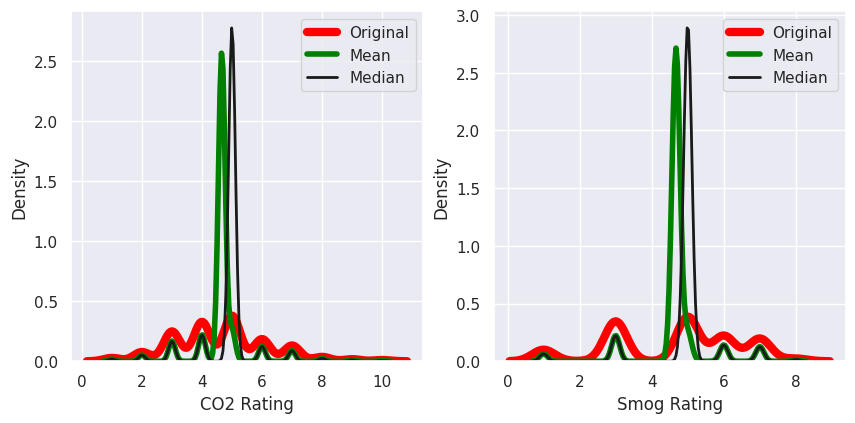

In [ ]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(['CO2 Rating','Smog Rating']):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20,hist=False, kde_kws={'linewidth':6, 'color':'red'}, label="Original",)
    sns.distplot(df_mean[var], bins=20,hist=False, kde_kws={'linewidth':4, 'color':'green'},label="Mean",)
    sns.distplot(df_med[var], bins=20,hist=False, kde_kws={'linewidth':2, 'color':'k'},label="Median",)
    plt.legend()

In [ ]:
df_med.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

In [ ]:
df_med['VEHICLE CLASS'].value_counts()

COMPACT                     3207
SUV                         3036
MID-SIZE                    2715
PICKUP TRUCK - STANDARD     2278
SUBCOMPACT                  2066
FULL-SIZE                   1256
TWO-SEATER                  1106
SUV: Small                   929
MINICOMPACT                  858
SUV - SMALL                  827
STATION WAGON - SMALL        810
Mid-size                     660
SUV: Standard                608
MINIVAN                      556
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
PICKUP TRUCK - SMALL         470
VAN - CARGO                  469
STATION WAGON - MID-SIZE     466
Subcompact                   451
Full-size                    417
VAN - PASSENGER              386
Two-seater                   313
Minicompact                  211
Station wagon: Small         140
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size       44
Minivan   

In [ ]:
def rep2(x,y):
    df_med['FUEL TYPE'].replace(x,y,inplace=True)

rep2('X','Regular gasoline')

rep2('Z','Premium gasoline')

rep2('D' ,'Diesel')

rep2('E','Ethanol (E85)')

rep2('N','Natural gas')

## Replacing repeated case sensitive values
###Coverting all repeated lowercase and uppercase values to uppercase





In [ ]:
def rep(x,y):
    df_med['VEHICLE CLASS'].replace(x,y,inplace=True)


rep('Compact','COMPACT')
rep('SUV: Small','SUV - SMALL')
rep('Two-seater','TWO-SEATER')
rep('Mid-size','MID-SIZE')
rep('Minicompact','MINICOMPACT')
rep('Subcompact','SUBCOMPACT')
rep('Station wagon: Small','STATION WAGON - SMALL')
rep('Full-size','FULL-SIZE')
rep('SUV: Standard','SUV - STANDARD')
rep('Special purpose vehicle','SPECIAL PURPOSE VEHICLE')
rep('Pickup truck: Small','PICKUP TRUCK - SMALL')
rep('Pickup truck: Standard','PICKUP TRUCK - STANDARD')
rep('Minivan','MINIVAN')
rep('Van: Passenger','VAN - PASSENGER')
rep('Station wagon: Mid-size','STATION WAGON: MID-SIZE')

In [ ]:
df_med['MAKE'].unique()

array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'EAGLE', 'FERRARI',
       'FORD', 'GEO', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'ISUZU',
       'JAGUAR', 'JEEP', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MAZDA',
       'MERCEDES-BENZ', 'MERCURY', 'NISSAN', 'OLDSMOBILE', 'PLYMOUTH',
       'PONTIAC', 'PORSCHE', 'ROLLS-ROYCE', 'SAAB', 'SATURN', 'SUBARU',
       'SUZUKI', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'DAEWOO', 'KIA',
       'MASERATI', 'MINI', 'MITSUBISHI', 'SMART', 'HUMMER',
       'ASTON MARTIN', 'LAMBORGHINI', 'BUGATTI', 'SCION', 'FIAT', 'RAM',
       'SRT', 'GENESIS', 'Acura', 'Alfa Romeo', 'Aston Martin', 'Audi',
       'Bentley', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler',
       'Dodge', 'Ford', 'Genesis', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus',
       'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Porsche',

In [ ]:
def rep1(x,y):
    df_med['MAKE'].replace(x,y,inplace=True)

In [ ]:
rep1('Acura','ACURA')
rep1('Alfa Romeo','ALFA ROMEO')
rep1('Audi','AUDI')
rep1('Bentley','BENTLEY')
rep1('Buick','BUICK')
rep1('Cadillac','CADILLAC')
rep1('Chevrolet','CHEVROLET')
rep1('Chrysler','CHRYSLER')
rep1('Dodge', 'DODGE')
rep1('Ford','FORD')
rep1('Genesis','GENESIS')
rep1('Honda','HONDA')
rep1('Hyundai','HYUNDAI')
rep1('Infiniti','INFINITI')

rep1('Jaguar','JAGUAR')
rep1('Jeep','JEEP')
rep1('Kia','KIA')
rep1('Lamborghini','LAMBORGHINI')
rep1('Land Rover','LAND ROVER')
rep1('Lexus','LEXUS')
rep1('Lincoln','LINCOLN')
rep1('Maserati','MASERATI')
rep1('Mazda','MAZDA')
rep1('Mercedes-Benz','MERCEDES-BENZ')
rep1('Mitsubishi','MITSUBISHI')
rep1('Nissan','NISSAN')
rep1('Porsche','PORSCHE')
rep1('Ram','RAM')
rep1('Rolls-Royce','ROLLS-ROYCE')
rep1('Subaru','SUBARU')
rep1('Toyota','TOYOTA')
rep1('Volkswagen','VOLKSWAGEN')
rep1('Volvo','VOLVO')

In [ ]:
def rep3(x,y):
    df_med['TRANSMISSION'].replace(x,y,inplace=True)
rep3('A','Automatic')

rep3('AM','Automated manual')

rep3('AS','Automatic with select shift')

rep3('AV','Continuously variable')

rep3('M','Manual')

rep3('3 - 10','Number of gears')

##What are the influencing features that affect CO2 emission and smog ratings the most?

#Features Selection

### Selection of Features on basis of Multivariate Pearson correlation method

In [ ]:
cor = df_med.corr()
cor

MODEL YEAR  ENGINE SIZE (L)  CYLINDERS  \
MODEL YEAR                       1.000000        -0.053910  -0.042903   
ENGINE SIZE (L)                 -0.053910         1.000000   0.909944   
CYLINDERS                       -0.042903         0.909944   1.000000   
FUEL CONSUMPTION CITY (L/100)   -0.194822         0.811895   0.779594   
FUEL CONSUMPTION HWY (L/100)    -0.173235         0.731357   0.672476   
COMB (L/100 km)                 -0.189731         0.793929   0.751520   
COMB (mpg)                       0.190047        -0.740352  -0.698615   
CO2 EMISSIONS (g/km)            -0.205244         0.798527   0.766113   
CO2 Rating                      -0.147843        -0.385670  -0.396544   
Smog Rating                     -0.117413        -0.174829  -0.196004   

                               FUEL CONSUMPTION CITY (L/100)  \
MODEL YEAR                                         -0.194822   
ENGINE SIZE (L)                                     0.811895   
CYLINDERS                                           0.779594   
FUEL CONSUMPTION CITY (L/100)                       1.000000   
FUEL CONSUMPTION HWY (L/100)                        0.942622   
COMB (L/100 km)                                     0.992679   
COMB (mpg)                                         -0.923624   
CO2 EMISSIONS (g/km)                                0.927856   
CO2 Rating                                         -0.418855   
Smog Rating                                        -0.181680   

                               FUEL CONSUMPTION HWY (L/100)  COMB (L/100 km)  \
MODEL YEAR                                        -0.173235        -0.189731   
ENGINE SIZE (L)                                    0.731357         0.793929   
CYLINDERS                                          0.672476         0.751520   
FUEL CONSUMPTION CITY (L/100)                      0.942622         0.992679   
FUEL CONSUMPTION HWY (L/100)                       1.000000         0.975750   
COMB (L/100 km)                                    0.975750         1.000000   
COMB (mpg)                                        -0.885986        -0.922613   
CO2 EMISSIONS (g/km)                               0.914104         0.935492   
CO2 Rating                                        -0.395124        -0.415993   
Smog Rating                                       -0.158393        -0.175801   

                               COMB (mpg)  CO2 EMISSIONS (g/km)  CO2 Rating  \
MODEL YEAR                       0.190047             -0.205244   -0.147843   
ENGINE SIZE (L)                 -0.740352              0.798527   -0.385670   
CYLINDERS                       -0.698615              0.766113   -0.396544   
FUEL CONSUMPTION CITY (L/100)   -0.923624              0.927856   -0.418855   
FUEL CONSUMPTION HWY (L/100)    -0.885986              0.914104   -0.395124   
COMB (L/100 km)                 -0.922613              0.935492   -0.415993   
COMB (mpg)                       1.000000             -0.900366    0.471063   
CO2 EMISSIONS (g/km)            -0.900366              1.000000   -0.458441   
CO2 Rating                       0.471063             -0.458441    1.000000   
Smog Rating                      0.189103             -0.200077    0.434861   

                               Smog Rating  
MODEL YEAR                       -0.117413  
ENGINE SIZE (L)                  -0.174829  
CYLINDERS                        -0.196004  
FUEL CONSUMPTION CITY (L/100)    -0.181680  
FUEL CONSUMPTION HWY (L/100)     -0.158393  
COMB (L/100 km)                  -0.175801  
COMB (mpg)                        0.189103  
CO2 EMISSIONS (g/km)             -0.200077  
CO2 Rating                        0.434861  
Smog Rating                       1.000000

<Axes: >

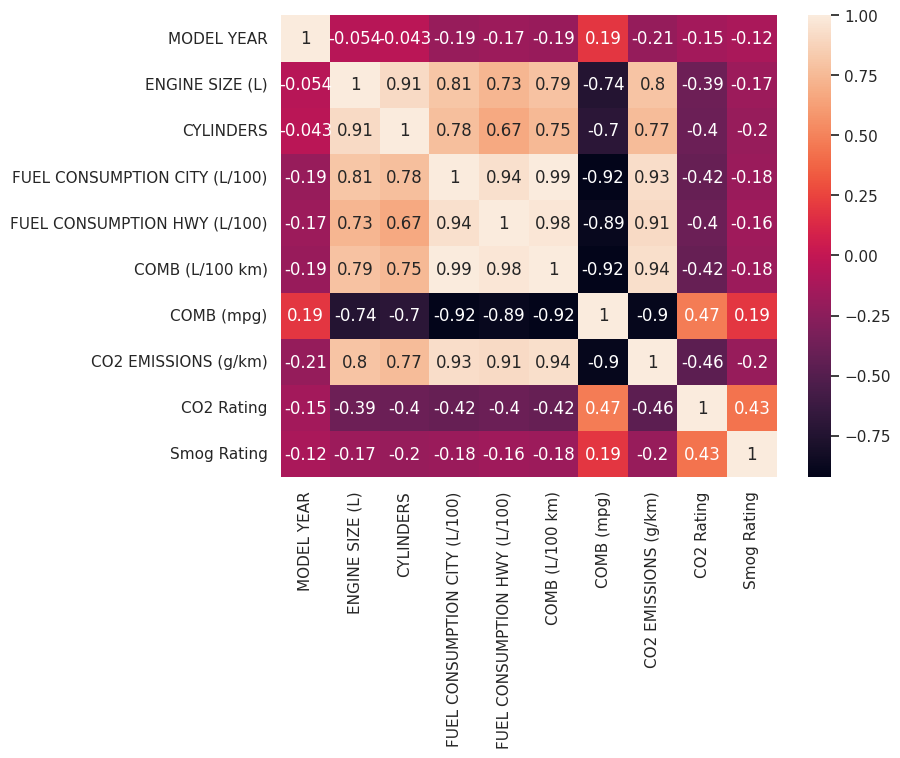

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cor,annot=True)

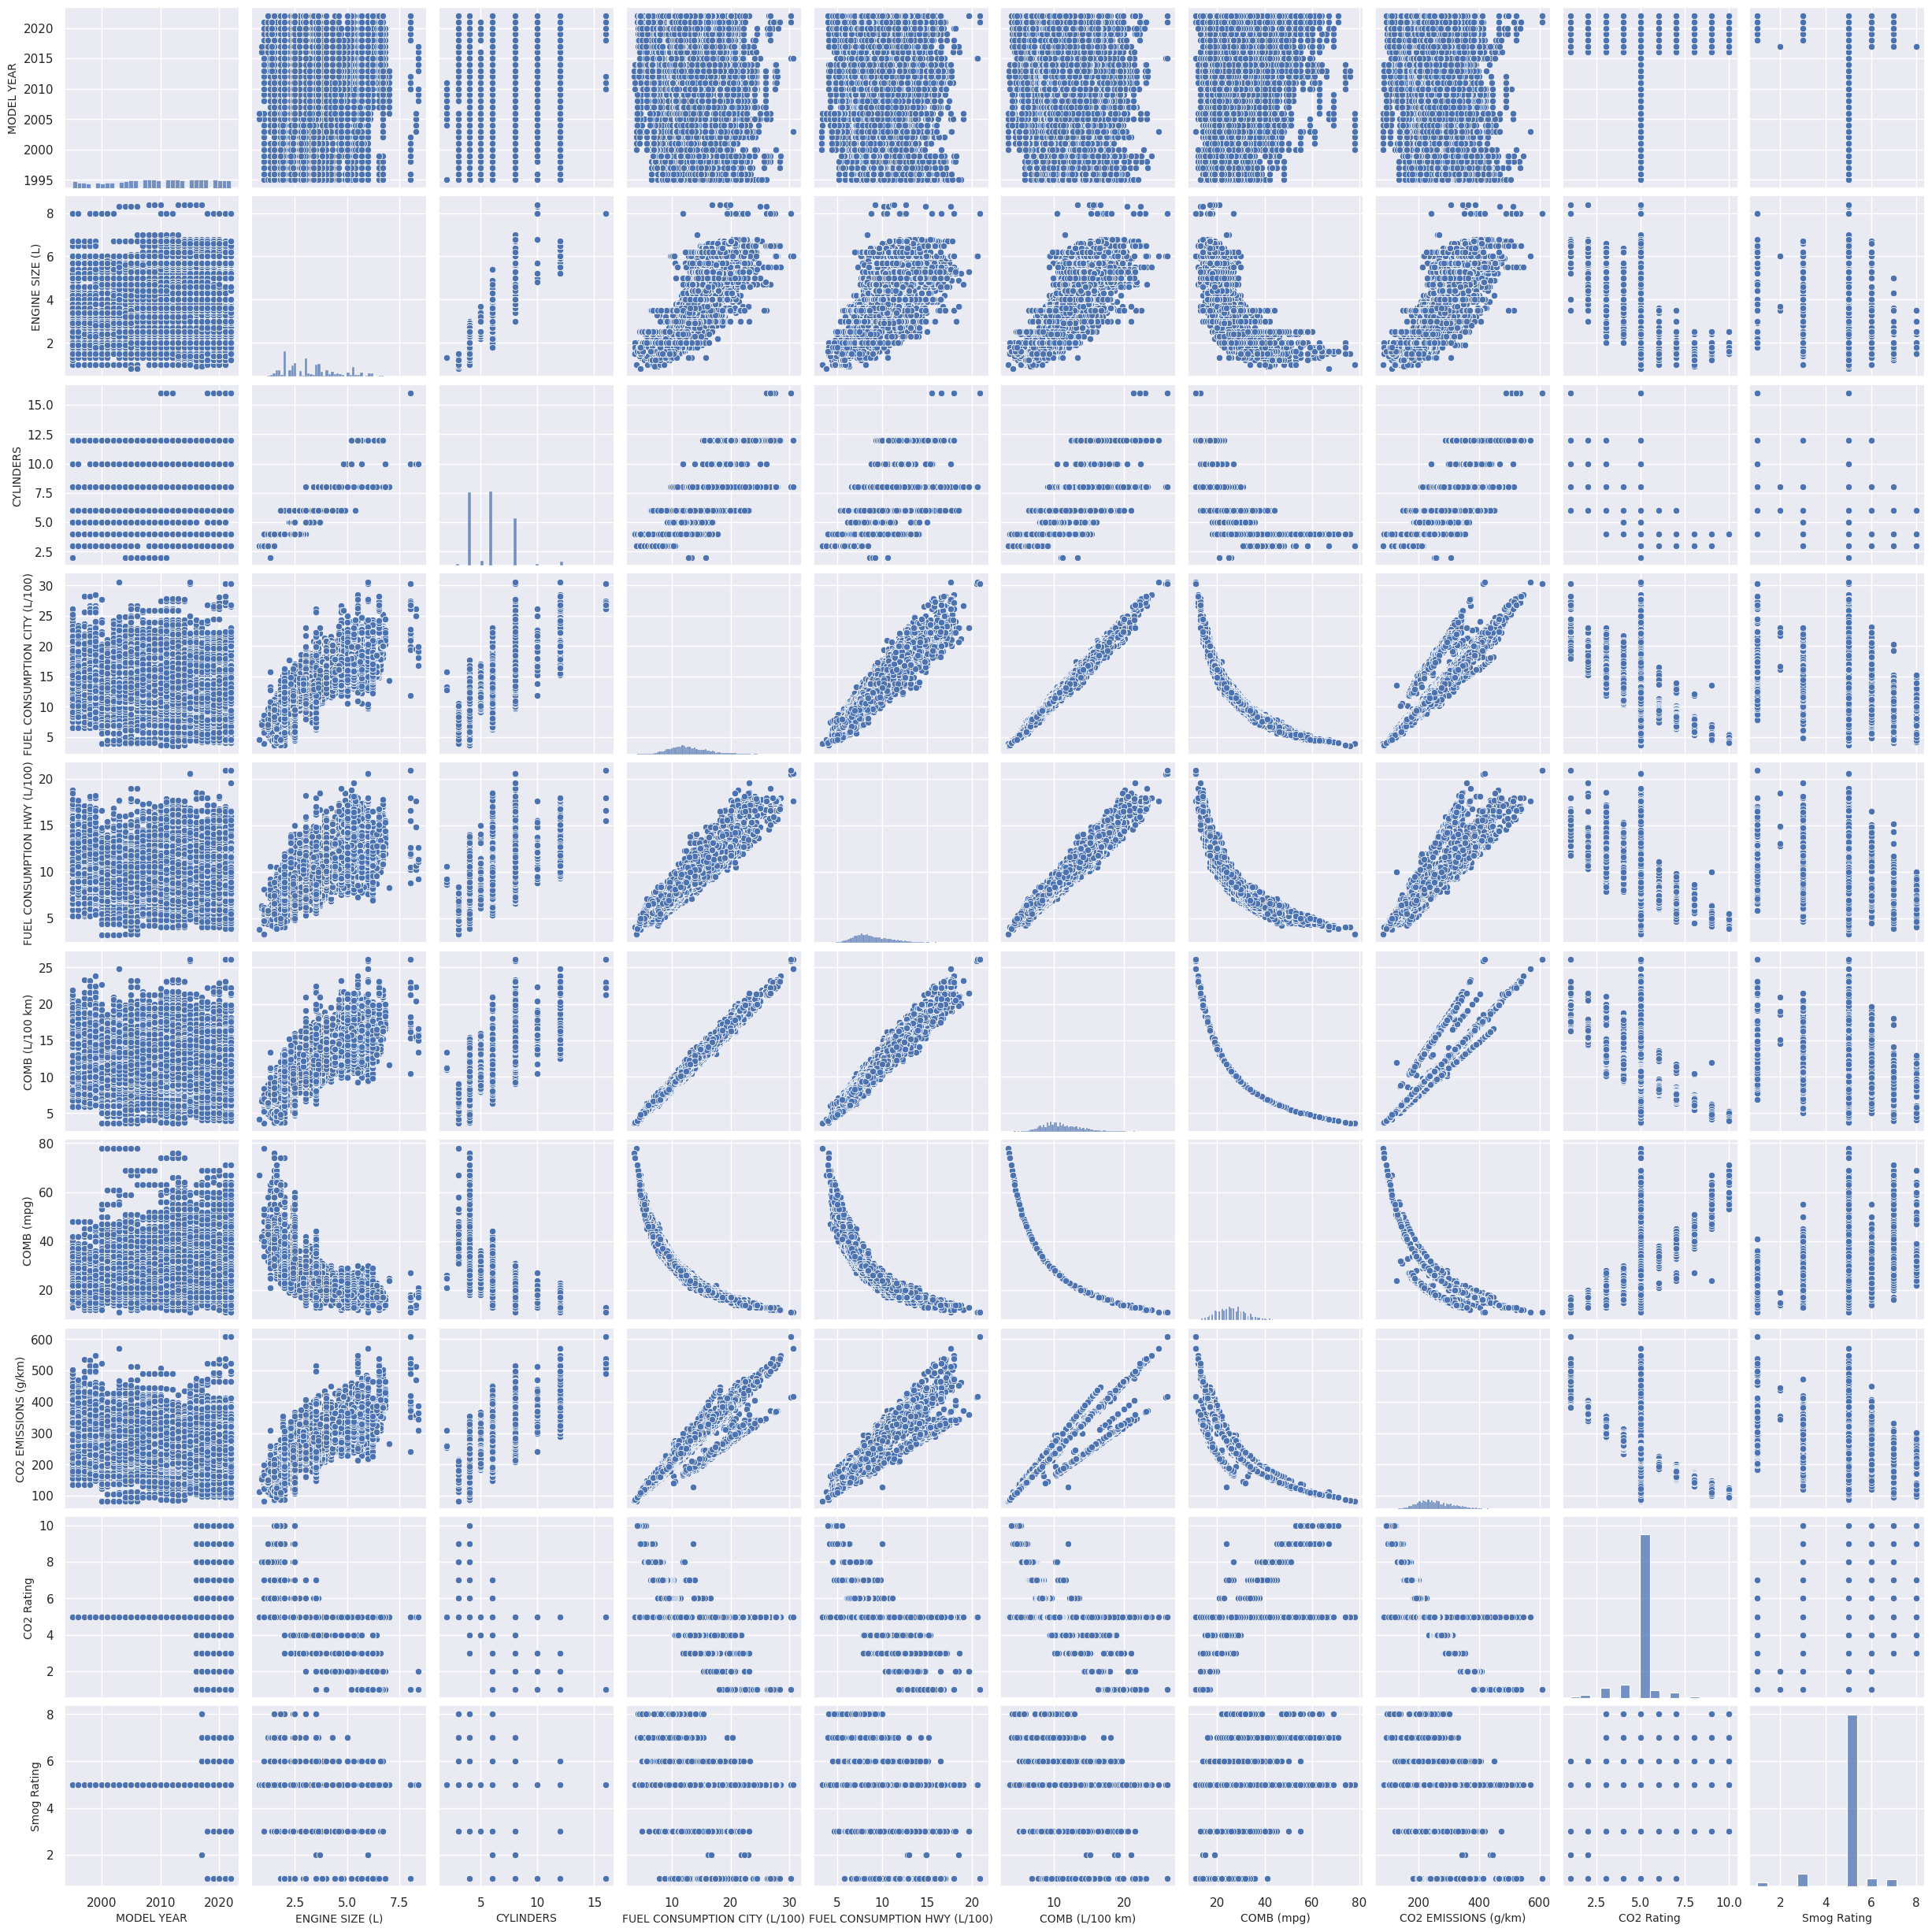

In [ ]:

sns.set_context(rc = {'axes.labelsize':10})
sns.pairplot(data = df_med)
plt.show()

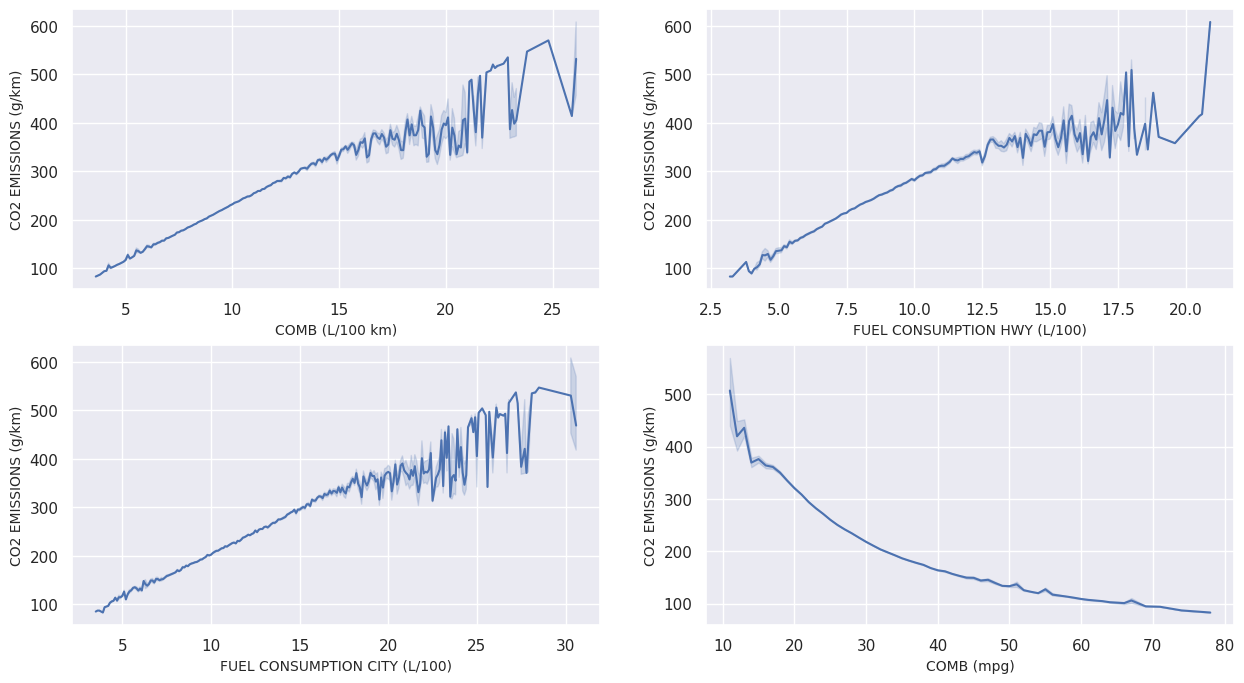

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.lineplot(data = df_med,x = 'COMB (L/100 km)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,2)
sns.lineplot(data = df_med,x = 'FUEL CONSUMPTION HWY (L/100)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,3)
sns.lineplot(data = df_med,x = 'FUEL CONSUMPTION CITY (L/100)',y='CO2 EMISSIONS (g/km)')
plt.subplot(2,2,4)
sns.lineplot(data = df_med,x = 'COMB (mpg)',y='CO2 EMISSIONS (g/km)')

plt.show()


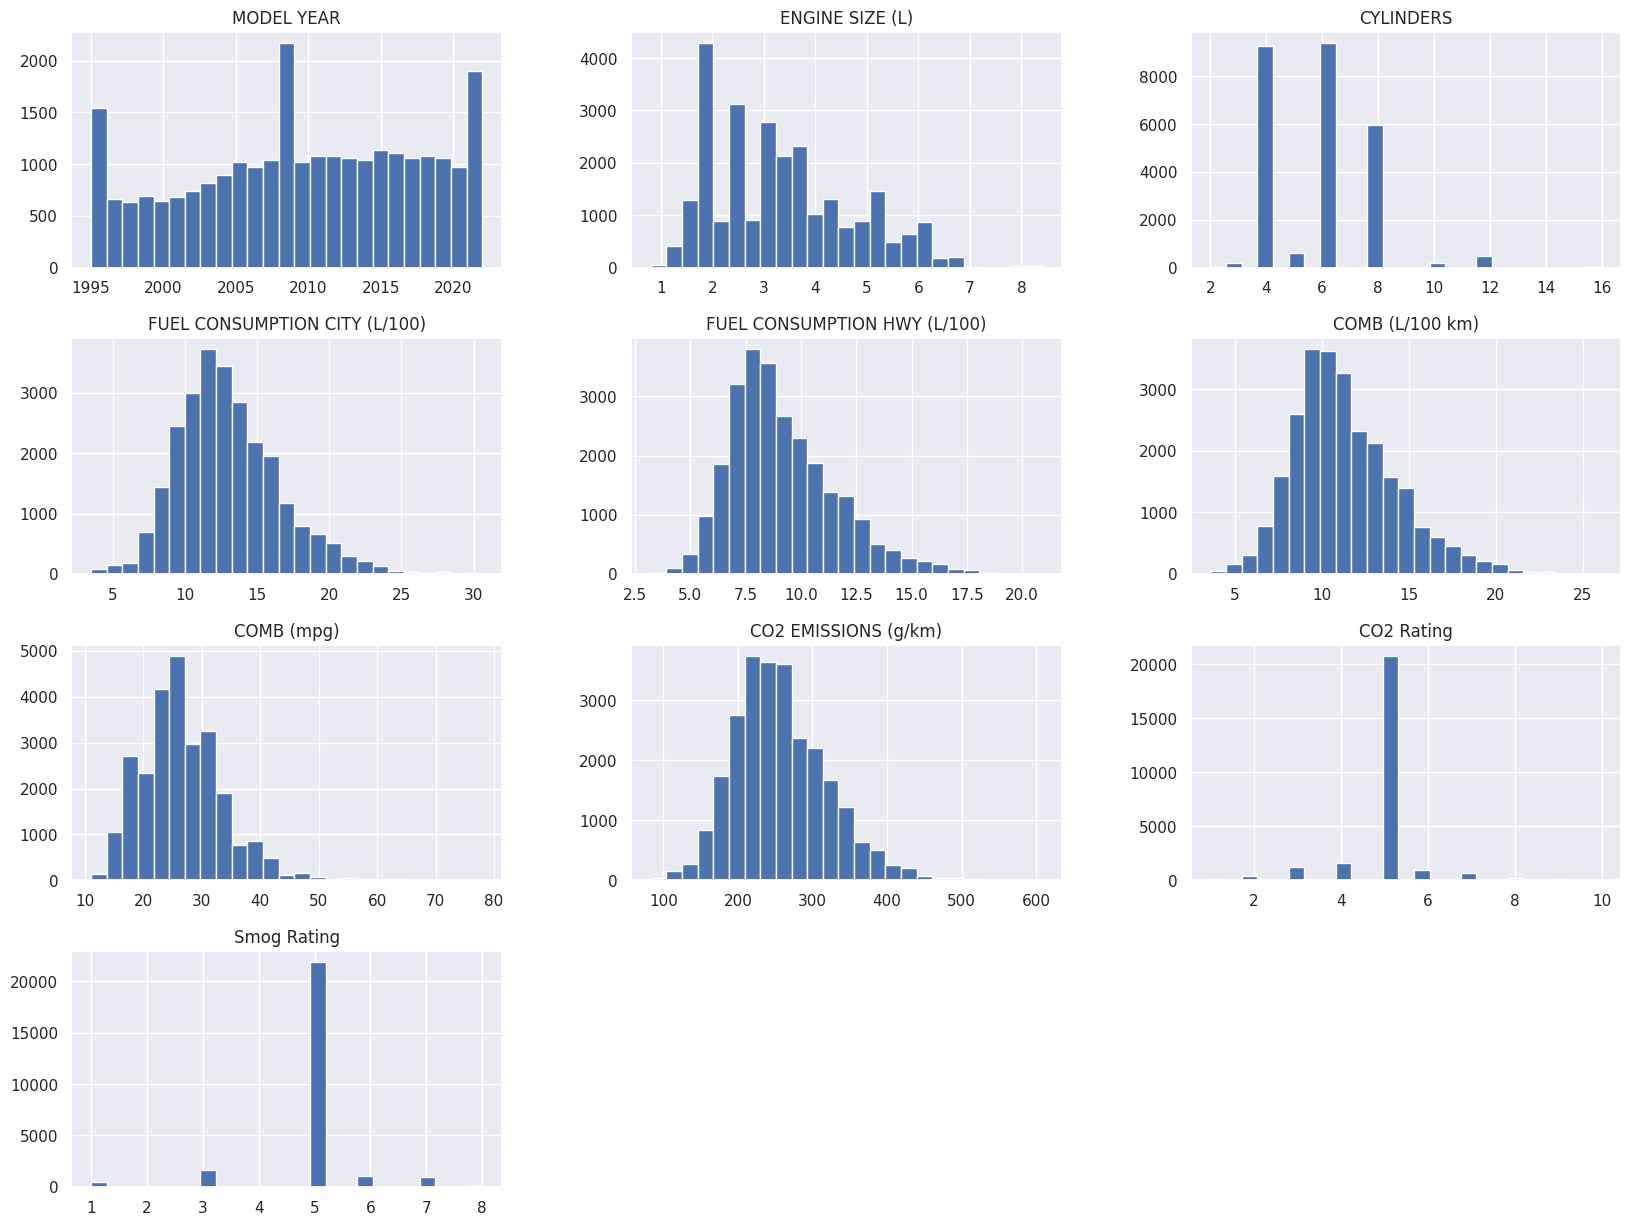

In [ ]:
df_med.hist(bins=25, figsize=(20,15))
plt.show()

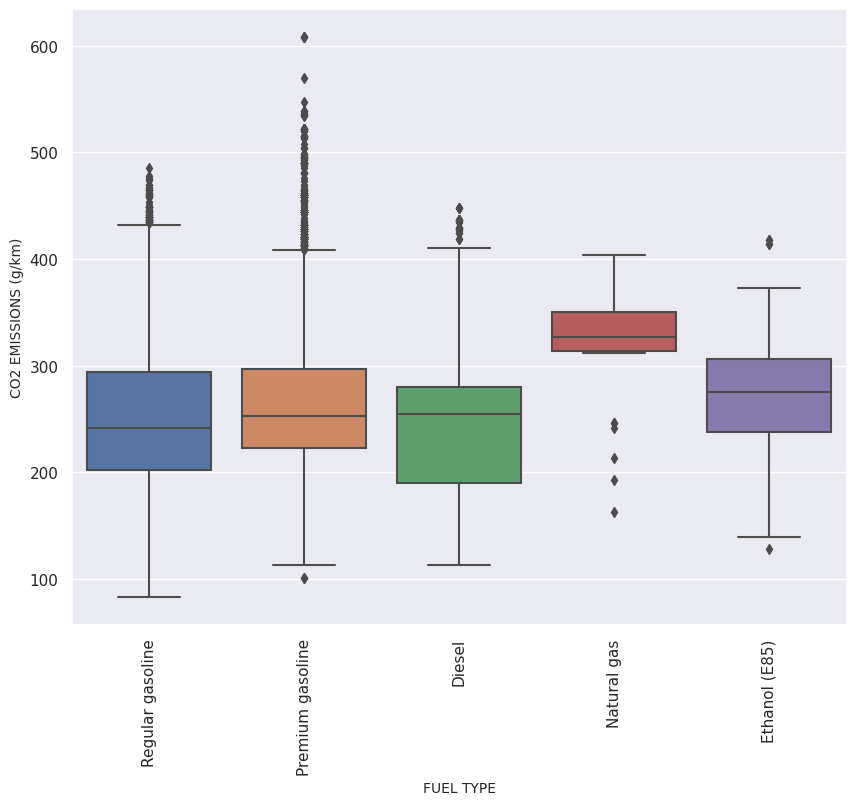

In [ ]:
plt.figure(figsize = (10,8))
sns.boxplot(data = df_med, x = 'FUEL TYPE', y = 'CO2 EMISSIONS (g/km)')
plt.xticks(rotation = 90)
plt.show()

###Splitting the Columns into Numerical and Categorical, for feature selection and converting categorical features into numerical using get_dummies

In [ ]:
cat_vars = df_med.select_dtypes(include=["O"]).columns
cat_vars

Index(['MAKE', 'MODEL(# = high output engine)', 'VEHICLE CLASS',
       'TRANSMISSION', 'FUEL TYPE'],
      dtype='object')

In [ ]:
cat_vars_1 = ['TRANSMISSION','FUEL TYPE']

In [ ]:
df_med_cat = pd.get_dummies(df_med[cat_vars_1],drop_first=True)
df_med_cat

TRANSMISSION_A3  TRANSMISSION_A4  TRANSMISSION_A5  TRANSMISSION_A6  \
1                    0                1                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                1                0                0   
5                    0                1                0                0   
...                ...              ...              ...              ...   
26071                0                0                0                0   
26072                0                0                0                0   
26073                0                0                0                0   
26074                0                0                0                0   
26075                0                0                0                0   

       TRANSMISSION_A7  TRANSMISSION_A8  TRANSMISSION_A9  TRANSMISSION_AM5  \
1                    0                0                0                 0   
2                    0                0                0                 0   
3                    0                0                0                 0   
4                    0                0                0                 0   
5                    0                0                0                 0   
...                ...              ...              ...               ...   
26071                0                0                0                 0   
26072                0                0                0                 0   
26073                0                0                0                 0   
26074                0                0                0                 0   
26075                0                0                0                 0   

       TRANSMISSION_AM6  TRANSMISSION_AM7  ...  TRANSMISSION_AV8  \
1                     0                 0  ...                 0   
2                     0                 0  ...                 0   
3                     0                 0  ...                 0   
4                     0                 0  ...                 0   
5                     0                 0  ...                 0   
...                 ...               ...  ...               ...   
26071                 0                 0  ...                 0   
26072                 0                 0  ...                 0   
26073                 0                 0  ...                 0   
26074                 0                 0  ...                 0   
26075                 0                 0  ...                 0   

       TRANSMISSION_Continuously variable  TRANSMISSION_M4  TRANSMISSION_M5  \
1                                       0                0                0   
2                                       0                0                1   
3                                       0                0                1   
4                                       0                0                0   
5                                       0                0                0   
...                                   ...              ...              ...   
26071                                   0                0                0   
26072                                   0                0                0   
26073                                   0                0                0   
26074                                   0                0                0   
26075                                   0                0                0   

       TRANSMISSION_M6  TRANSMISSION_M7  FUEL TYPE_Ethanol (E85)  \
1                    0                0                        0   
2                    0                0                        0   
3                    0                0                        0   
4                    0                0                        0   
5                    0                0

In [ ]:
num_vars = df_med.select_dtypes(include=['int64','float64']).columns
num_vars

Index(['MODEL YEAR', 'ENGINE SIZE (L)', 'CYLINDERS',
       'FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating'],
      dtype='object')

#$L/100 Km = \frac {282.48}{Xmpg} $

In [ ]:
num_vars_1 = ['ENGINE SIZE (L)', 'CYLINDERS','FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)',
       'COMB (L/100 km)', 'CO2 EMISSIONS (g/km)', 'CO2 Rating',
       'Smog Rating']

In [ ]:
df_med_final = pd.concat([df_med[num_vars_1],df_med_cat],axis = 1)
df_med_final

ENGINE SIZE (L)  CYLINDERS  FUEL CONSUMPTION CITY (L/100)  \
1                  1.8        4.0                           11.6   
2                  1.8        4.0                           11.0   
3                  1.8        4.0                           10.8   
4                  3.2        6.0                           14.2   
5                  3.2        6.0                           14.6   
...                ...        ...                            ...   
26071              2.0        4.0                           10.7   
26072              2.0        4.0                           10.5   
26073              2.0        4.0                           11.0   
26074              2.0        4.0                           11.5   
26075              2.0        4.0                           12.4   

       FUEL CONSUMPTION HWY (L/100)  COMB (L/100 km)  CO2 EMISSIONS (g/km)  \
1                               8.3             10.1                 232.0   
2                               8.3              9.8                 225.0   
3                               8.3              9.7                 223.0   
4                              10.5             12.5                 288.0   
5                              11.0             13.0                 299.0   
...                             ...              ...                   ...   
26071                           7.7              9.4                 219.0   
26072                           8.1              9.4                 219.0   
26073                           8.7              9.9                 232.0   
26074                           8.4             10.1                 236.0   
26075                           8.9             10.8                 252.0   

       CO2 Rating  Smog Rating  TRANSMISSION_A3  TRANSMISSION_A4  ...  \
1             5.0          5.0                0                1  ...   
2             5.0          5.0                0                0  ...   
3             5.0          5.0                0                0  ...   
4             5.0          5.0                0                1  ...   
5             5.0          5.0                0                1  ...   
...           ...          ...              ...              ...  ...   
26071         5.0          5.0                0                0  ...   
26072         5.0          5.0                0                0  ...   
26073         5.0          7.0                0                0  ...   
26074         5.0          5.0                0                0  ...   
26075         5.0          7.0                0                0  ...   

       TRANSMISSION_AV8  TRANSMISSION_Continuously variable  TRANSMISSION_M4  \
1                     0                                   0                0   
2                     0                                   0                0   
3                     0                                   0                0   
4                     0                                   0                0   
5                     0                                   0                0   
...                 ...                                 ...              ...   
26071                 0                                   0                0   
26072                 0                                   0                0   
26073                 0                                   0                0   
26074                 0                                   0                0   
26075                 0                                   0                0   

       TRANSMISSION_M5  TRANSMISSION_M6  TRANSMISSION_M7  \
1                    0                0                0   
2                    1                0                0   
3                    1                0                0   
4                    0                0                0   
5                    0                0                0   
...                ...              ...              ..

## Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

##CO2 emissions when Fuel Consumption for City and Highway is considered COMBINED (55% City + 45% Highway)

In [ ]:
y = df_med_final['CO2 EMISSIONS (g/km)']
X = df_med_final.drop(['CO2 EMISSIONS (g/km)','Smog Rating','CO2 Rating','FUEL CONSUMPTION CITY (L/100)', 'FUEL CONSUMPTION HWY (L/100)'],axis = 1)

In [ ]:
y

1        232.0
2        225.0
3        223.0
4        288.0
5        299.0
         ...  
26071    219.0
26072    219.0
26073    232.0
26074    236.0
26075    252.0
Name: CO2 EMISSIONS (g/km), Length: 26075, dtype: float64

In [ ]:
X

ENGINE SIZE (L)  CYLINDERS  COMB (L/100 km)  TRANSMISSION_A3  \
1                  1.8        4.0             10.1                0   
2                  1.8        4.0              9.8                0   
3                  1.8        4.0              9.7                0   
4                  3.2        6.0             12.5                0   
5                  3.2        6.0             13.0                0   
...                ...        ...              ...              ...   
26071              2.0        4.0              9.4                0   
26072              2.0        4.0              9.4                0   
26073              2.0        4.0              9.9                0   
26074              2.0        4.0             10.1                0   
26075              2.0        4.0             10.8                0   

       TRANSMISSION_A4  TRANSMISSION_A5  TRANSMISSION_A6  TRANSMISSION_A7  \
1                    1                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    1                0                0                0   
5                    1                0                0                0   
...                ...              ...              ...              ...   
26071                0                0                0                0   
26072                0                0                0                0   
26073                0                0                0                0   
26074                0                0                0                0   
26075                0                0                0                0   

       TRANSMISSION_A8  TRANSMISSION_A9  ...  TRANSMISSION_AV8  \
1                    0                0  ...                 0   
2                    0                0  ...                 0   
3                    0                0  ...                 0   
4                    0                0  ...                 0   
5                    0                0  ...                 0   
...                ...              ...  ...               ...   
26071                0                0  ...                 0   
26072                0                0  ...                 0   
26073                0                0  ...                 0   
26074                0                0  ...                 0   
26075                0                0  ...                 0   

       TRANSMISSION_Continuously variable  TRANSMISSION_M4  TRANSMISSION_M5  \
1                                       0                0                0   
2                                       0                0                1   
3                                       0                0                1   
4                                       0                0                0   
5                                       0                0                0   
...                                   ...              ...              ...   
26071                                   0                0                0   
26072                                   0                0                0   
26073                                   0                0                0   
26074                                   0                0                0   
26075                                   0                0                0   

       TRANSMISSION_M6  TRANSMISSION_M7  FUEL TYPE_Ethanol (E85)  \
1                    0                0                        0   
2                    0                0                        0   
3                    0                0                        0   
4                    0                0                        0   
5                    0                0                        0   
...                ...              ...                      ...   
26071      

# Model Splitting,Selection,Training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

In [ ]:
from pycaret.regression import *

In [ ]:
setup(data=X,target= y)
best_model=compare_models()

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from math import sqrt



model_lr = LinearRegression()
model_la = Lasso()
model_lri = Ridge()
model_le = ElasticNet()
model_rf = RandomForestRegressor()
model_gbr = GradientBoostingRegressor()
model_dtr = DecisionTreeRegressor()
model_xgb = XGBRegressor()
model_ada = AdaBoostRegressor()

models = {'XGBRegressor':model_xgb,'Random Forest Regression': model_rf,'Decision Tree Regressor': model_dtr,'Gradient Boosting Regressor':model_gbr,
          'Ridge':model_lri,'Linear Regression':model_lr,'Lasso':model_la,
          'AdaRegrssor':model_ada,'Elastic Net':model_le}

for i in models.keys():
  print(i)
  models[i].fit(X_train, y_train)
  y_pred = models[i].predict(X_test)
  print("Accuracy in training dataset: ", (models[i].score(X_train, y_train)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test, y_test)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred))) #lower the RMSE value is equal to lower magnitude of error term (RMSE shows the performance of model)
  print('--------------------------------------')

XGBRegressor
Accuracy in training dataset:  99.94224803304202
Accuracy in testing dataset:  99.91775676937695
RMSE value:  1.8084109085417885
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.95492240645684
Accuracy in testing dataset:  99.84056842929017
RMSE value:  2.5178751965342094
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.9763952695684
Accuracy in testing dataset:  99.81153982812296
RMSE value:  2.7375170243465554
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  99.6848076795021
Accuracy in testing dataset:  99.68590029974769
RMSE value:  3.534115983863446
--------------------------------------
Ridge
Accuracy in training dataset:  99.43518143194669
Accuracy in testing dataset:  99.43621438985254
RMSE value:  4.734826075857212
--------------------------------------
Linear Regression
Accuracy in training dataset:  99.43624517746981
A

In [ ]:
y_pred=model_dtr.predict(X_test) #combine fuel consumption

##CO2 emissions when Fuel Consumption for City and Highway is considered separately

In [ ]:
X_hwy = df_med_final.drop(['CO2 EMISSIONS (g/km)','FUEL CONSUMPTION CITY (L/100)','COMB (L/100 km)','CO2 Rating','Smog Rating'],axis =1)
X_cty = df_med_final.drop(['CO2 EMISSIONS (g/km)','FUEL CONSUMPTION HWY (L/100)','COMB (L/100 km)','CO2 Rating','Smog Rating'],axis = 1)


In [ ]:
X_hwy.head()

ENGINE SIZE (L)  CYLINDERS  FUEL CONSUMPTION HWY (L/100)  TRANSMISSION_A3  \
1              1.8        4.0                           8.3                0   
2              1.8        4.0                           8.3                0   
3              1.8        4.0                           8.3                0   
4              3.2        6.0                          10.5                0   
5              3.2        6.0                          11.0                0   

   TRANSMISSION_A4  TRANSMISSION_A5  TRANSMISSION_A6  TRANSMISSION_A7  \
1                1                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   
5                1                0                0                0   

   TRANSMISSION_A8  TRANSMISSION_A9  ...  TRANSMISSION_AV8  \
1                0                0  ...                 0   
2                0                0  ...                 0   
3                0                0  ...                 0   
4                0                0  ...                 0   
5                0                0  ...                 0   

   TRANSMISSION_Continuously variable  TRANSMISSION_M4  TRANSMISSION_M5  \
1                                   0                0                0   
2                                   0                0                1   
3                                   0                0                1   
4                                   0                0                0   
5                                   0                0                0   

   TRANSMISSION_M6  TRANSMISSION_M7  FUEL TYPE_Ethanol (E85)  \
1                0                0                        0   
2                0                0                        0   
3                0                0                        0   
4                0                0                        0   
5                0                0                        0   

   FUEL TYPE_Natural gas  FUEL TYPE_Premium gasoline  \
1                      0                           0   
2                      0                           0   
3                      0                           1   
4                      0                           1   
5                      0                           1   

   FUEL TYPE_Regular gasoline  
1                           1  
2                           1  
3                           0  
4                           0  
5                           0  

[5 rows x 36 columns]

In [ ]:
X_cty.head()

ENGINE SIZE (L)  CYLINDERS  FUEL CONSUMPTION CITY (L/100)  TRANSMISSION_A3  \
1              1.8        4.0                           11.6                0   
2              1.8        4.0                           11.0                0   
3              1.8        4.0                           10.8                0   
4              3.2        6.0                           14.2                0   
5              3.2        6.0                           14.6                0   

   TRANSMISSION_A4  TRANSMISSION_A5  TRANSMISSION_A6  TRANSMISSION_A7  \
1                1                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                1                0                0                0   
5                1                0                0                0   

   TRANSMISSION_A8  TRANSMISSION_A9  ...  TRANSMISSION_AV8  \
1                0                0  ...                 0   
2                0                0  ...                 0   
3                0                0  ...                 0   
4                0                0  ...                 0   
5                0                0  ...                 0   

   TRANSMISSION_Continuously variable  TRANSMISSION_M4  TRANSMISSION_M5  \
1                                   0                0                0   
2                                   0                0                1   
3                                   0                0                1   
4                                   0                0                0   
5                                   0                0                0   

   TRANSMISSION_M6  TRANSMISSION_M7  FUEL TYPE_Ethanol (E85)  \
1                0                0                        0   
2                0                0                        0   
3                0                0                        0   
4                0                0                        0   
5                0                0                        0   

   FUEL TYPE_Natural gas  FUEL TYPE_Premium gasoline  \
1                      0                           0   
2                      0                           0   
3                      0                           1   
4                      0                           1   
5                      0                           1   

   FUEL TYPE_Regular gasoline  
1                           1  
2                           1  
3                           0  
4                           0  
5                           0  

[5 rows x 36 columns]

In [ ]:
y.head()

1    232.0
2    225.0
3    223.0
4    288.0
5    299.0
Name: CO2 EMISSIONS (g/km), dtype: float64

##Highway

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_hwy, y, test_size = 0.3, random_state = 48)

In [ ]:
for i in models.keys():
  print(i)
  models[i].fit(X_train1, y_train1)
  y_pred1 = models[i].predict(X_test1)
  print("Accuracy in training dataset: ", (models[i].score(X_train1, y_train1)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test1, y_test1)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test1, y_pred1)))
  print('--------------------------------------')

XGBRegressor
Accuracy in training dataset:  99.0640418009974
Accuracy in testing dataset:  98.69167717954053
RMSE value:  7.2268969452990905
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.59984376231036
Accuracy in testing dataset:  98.86245261078759
RMSE value:  6.738747014995613
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.67180783824992
Accuracy in testing dataset:  98.63490587045284
RMSE value:  7.382028251863786
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  97.69192250747626
Accuracy in testing dataset:  97.47180527722794
RMSE value:  10.046150123016714
--------------------------------------
Ridge
Accuracy in training dataset:  96.90449378976396
Accuracy in testing dataset:  96.88809645165324
RMSE value:  11.145703029392028
--------------------------------------
Linear Regression
Accuracy in training dataset:  96.90570317651586


In [ ]:
y_pred1=model_dtr.predict(X_test1)

##City

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cty, y, test_size = 0.3, random_state = 58)

In [ ]:
for i in models.keys():
  print(i)
  models[i].fit(X_train2, y_train2)
  y_pred2 = models[i].predict(X_test2)
  print("Accuracy in training dataset: ", (models[i].score(X_train2, y_train2)*100))
  print("Accuracy in testing dataset: ", models[i].score(X_test2, y_test2)*100)
  print("RMSE value: ", sqrt(mean_squared_error(y_test2, y_pred2)))
  print('--------------------------------------')

XGBRegressor
Accuracy in training dataset:  99.38793612697228
Accuracy in testing dataset:  99.22625664461322
RMSE value:  5.584192134492931
--------------------------------------
Random Forest Regression
Accuracy in training dataset:  99.74303950541766
Accuracy in testing dataset:  99.29714565455797
RMSE value:  5.322241210876457
--------------------------------------
Decision Tree Regressor
Accuracy in training dataset:  99.7987960861207
Accuracy in testing dataset:  99.13938102423069
RMSE value:  5.889349731888427
--------------------------------------
Gradient Boosting Regressor
Accuracy in training dataset:  98.23993548848739
Accuracy in testing dataset:  98.16225027948346
RMSE value:  8.606073860197526
--------------------------------------
Ridge
Accuracy in training dataset:  98.12793909660651
Accuracy in testing dataset:  98.10933077507963
RMSE value:  8.72910392168295
--------------------------------------
Linear Regression
Accuracy in training dataset:  98.12985619230294
Accu

###Will there be any difference in the CO2 emissions when Fuel Consumption for City and Highway is considered separately and when their weighted variable interaction is considered?

In [ ]:
y_pred2=model_dtr.predict(X_test2) #Decision Tree Regressor
out=pd.DataFrame({'actual':y_test,'predicted_comb':y_pred,'predicted_Hwy':y_pred1, 'predicted_Cty':y_pred2})
out=df_med.copy().merge(out,left_index=True,right_index=True)
out[['actual','predicted_comb','predicted_Hwy','predicted_Cty']].sample(10)

actual  predicted_comb  predicted_Hwy  predicted_Cty
9459    320.0      320.000000     205.750000     209.000000
16559   253.0      258.000000     293.000000     277.000000
19902   185.0      182.000000     332.787879     182.000000
19846   217.0      212.000000     195.500000     315.000000
25235   241.0      238.777778     184.142857     351.200000
5921    308.0      308.000000     202.000000     202.250000
19241   269.0      274.000000     230.000000     414.000000
11625   173.0      173.000000     247.777778     215.111111
7618    371.0      371.000000     183.166667     253.000000
14985   147.0      147.000000     117.500000     274.000000

In [ ]:
out2 = out.copy()
out2['diff'] = np.where(out2['predicted_Hwy'] == out2['predicted_Cty'], 0, out2['predicted_Hwy'] - out2['predicted_Cty'])
out2['diff']

2       -189.428571
3         28.500000
8        213.000000
9       -140.000000
12        37.000000
            ...    
26050      9.111111
26055     43.000000
26065   -105.789474
26072    -26.000000
26075     90.750000
Name: diff, Length: 7823, dtype: float64

In [ ]:
(out2['diff'] < 0).sum() #this show the negative difference between pred_hwy and pred_cty

3893

In [ ]:
(out2['diff'] >= 0).sum() #this show the positive difference between pred_hwy and pred_cty

3930

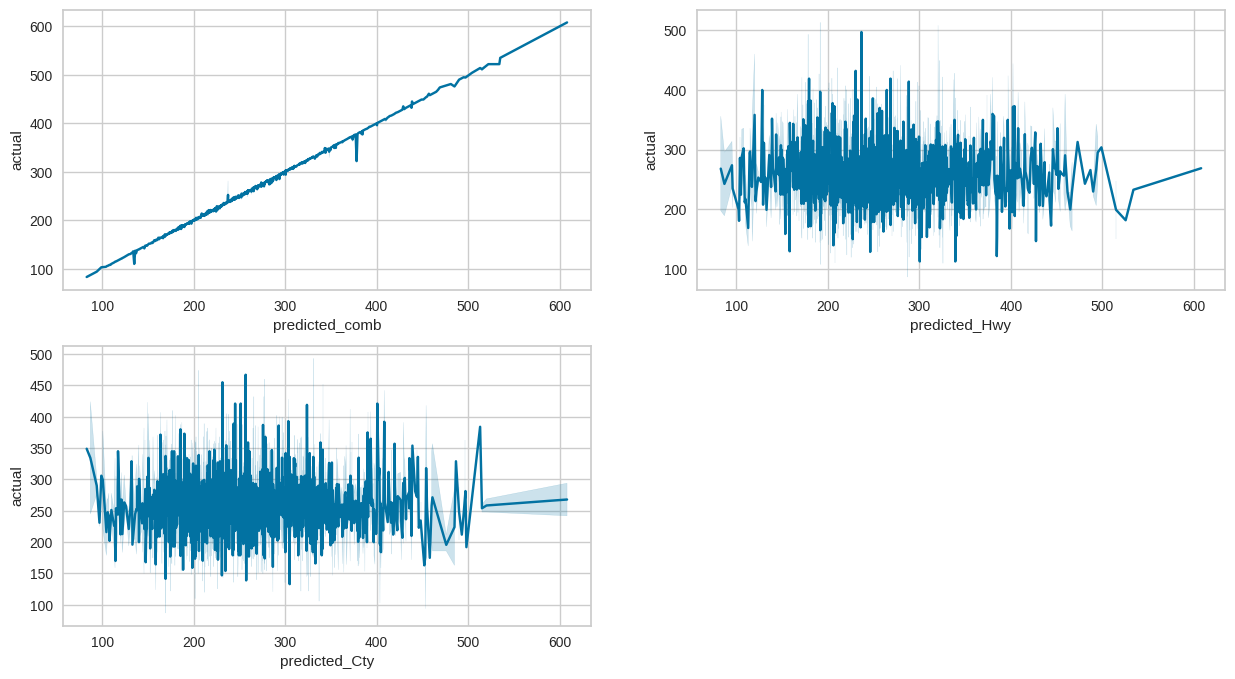

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.lineplot(data = out,x = 'predicted_comb',y='actual')
plt.subplot(2,2,2)
sns.lineplot(data = out,x = 'predicted_Hwy',y='actual')
plt.subplot(2,2,3)
sns.lineplot(data = out,x = 'predicted_Cty',y='actual')


plt.show()

In [ ]:
import plotly.express as px

In [ ]:
fig=px.line(out.sort_values(by='predicted_comb'),
            x='predicted_comb',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_comb',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Hwy'),
            x='predicted_Hwy',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Hwy',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Cty'),
            x='predicted_Cty',
            y = 'actual',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Cty',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

In [ ]:
fig=px.line(out.sort_values(by='predicted_Hwy'),
            x='predicted_Hwy',
            y = 'predicted_Cty',
            animation_frame='FUEL TYPE',
            animation_group='predicted_Hwy',
            color='FUEL TYPE',
            markers=True,
            template='plotly_dark',
            #title='<b>Driver Age vs Delivery Time (Weatherwise)'
            )

fig.update_traces(showlegend=False)

##Classification

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
df_med_final

ENGINE SIZE (L)  CYLINDERS  FUEL CONSUMPTION CITY (L/100)  \
1                  1.8        4.0                           11.6   
2                  1.8        4.0                           11.0   
3                  1.8        4.0                           10.8   
4                  3.2        6.0                           14.2   
5                  3.2        6.0                           14.6   
...                ...        ...                            ...   
26071              2.0        4.0                           10.7   
26072              2.0        4.0                           10.5   
26073              2.0        4.0                           11.0   
26074              2.0        4.0                           11.5   
26075              2.0        4.0                           12.4   

       FUEL CONSUMPTION HWY (L/100)  COMB (L/100 km)  CO2 EMISSIONS (g/km)  \
1                               8.3             10.1                 232.0   
2                               8.3              9.8                 225.0   
3                               8.3              9.7                 223.0   
4                              10.5             12.5                 288.0   
5                              11.0             13.0                 299.0   
...                             ...              ...                   ...   
26071                           7.7              9.4                 219.0   
26072                           8.1              9.4                 219.0   
26073                           8.7              9.9                 232.0   
26074                           8.4             10.1                 236.0   
26075                           8.9             10.8                 252.0   

       CO2 Rating  Smog Rating  TRANSMISSION_A3  TRANSMISSION_A4  ...  \
1             5.0          5.0                0                1  ...   
2             5.0          5.0                0                0  ...   
3             5.0          5.0                0                0  ...   
4             5.0          5.0                0                1  ...   
5             5.0          5.0                0                1  ...   
...           ...          ...              ...              ...  ...   
26071         5.0          5.0                0                0  ...   
26072         5.0          5.0                0                0  ...   
26073         5.0          7.0                0                0  ...   
26074         5.0          5.0                0                0  ...   
26075         5.0          7.0                0                0  ...   

       TRANSMISSION_AV8  TRANSMISSION_Continuously variable  TRANSMISSION_M4  \
1                     0                                   0                0   
2                     0                                   0                0   
3                     0                                   0                0   
4                     0                                   0                0   
5                     0                                   0                0   
...                 ...                                 ...              ...   
26071                 0                                   0                0   
26072                 0                                   0                0   
26073                 0                                   0                0   
26074                 0                                   0                0   
26075                 0                                   0                0   

       TRANSMISSION_M5  TRANSMISSION_M6  TRANSMISSION_M7  \
1                    0                0                0   
2                    1                0                0   
3                    1                0                0   
4                    0                0                0   
5                    0                0                0   
...                ...              ...              ..

### Splitting Dataset

In [ ]:
Xc = df_med_final.drop(['Smog Rating','FUEL CONSUMPTION CITY (L/100)','FUEL CONSUMPTION HWY (L/100)'],axis = 1)
yc = df_med_final['Smog Rating']

In [ ]:
setup(data=Xc,target=yc)
best_model=compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size = 0.2, random_state = 92,stratify = yc)

In [ ]:
scaler = StandardScaler()
X_trainc = scaler.fit_transform(X_trainc)
X_testc = scaler.transform(X_testc)

# Model1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_trainc, y_trainc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_testc)
y_pred

array([5., 5., 5., ..., 5., 5., 7.])

In [ ]:
lr_train_acc = accuracy_score(y_trainc, lr.predict(X_trainc))
lr_train_acc

0.849137104506232

In [ ]:
lr_test_acc = accuracy_score(y_testc, y_pred)
lr_test_acc

0.8538830297219558

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  44    0   11   39    1    0    0]
 [   0    0    1    0    0    0    0]
 [  14    0   71  235    7    3    0]
 [  22    1   34 4255   32   26    0]
 [   0    0   12  156   27   15    0]
 [   0    0    0  123    8   56    0]
 [   0    0    0   16    0    6    0]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.55      0.46      0.50        95
         2.0       0.00      0.00      0.00         1
         3.0       0.55      0.22      0.31       330
         5.0       0.88      0.97      0.93      4370
         6.0       0.36      0.13      0.19       210
         7.0       0.53      0.30      0.38       187
         8.0       0.00      0.00      0.00        22

    accuracy                           0.85      5215
   macro avg       0.41      0.30      0.33      5215
weighted avg       0.82      0.85      0.83      5215



# Model2 KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_trainc, y_trainc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = knn.predict(X_testc)
y_pred

array([5., 6., 5., ..., 5., 5., 6.])

In [ ]:
knn_train_acc = accuracy_score(y_trainc, knn.predict(X_trainc))
knn_train_acc

0.9259827420901247

In [ ]:
knn_test_acc = accuracy_score(y_testc, y_pred)
knn_test_acc

0.89856184084372

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  76    0    8   10    1    0    0]
 [   0    1    0    0    0    0    0]
 [   5    2  236   60   15   12    0]
 [  42    0   77 4181   26   44    0]
 [   0    0   49   81   68   11    1]
 [   0    0   15   36   11  123    2]
 [   0    0    0    6    3   12    1]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.62      0.80      0.70        95
         2.0       0.33      1.00      0.50         1
         3.0       0.61      0.72      0.66       330
         5.0       0.96      0.96      0.96      4370
         6.0       0.55      0.32      0.41       210
         7.0       0.61      0.66      0.63       187
         8.0       0.25      0.05      0.08        22

    accuracy                           0.90      5215
   macro avg       0.56      0.64      0.56      5215
weighted avg       0.90      0.90      0.90      5215



# Model3 Support vector Classifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(X_trainc, y_trainc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = svc.predict(X_testc)
y_pred

array([5., 5., 5., ..., 5., 5., 5.])

In [ ]:
svc_train_acc = accuracy_score(y_trainc, svc.predict(X_trainc))
svc_train_acc

0.8662991371045062

In [ ]:
svc_test_acc = accuracy_score(y_testc, y_pred)
svc_test_acc

0.8630872483221477

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  34    0   14   47    0    0    0]
 [   0    0    1    0    0    0    0]
 [   7    0  121  199    0    3    0]
 [  14    0   45 4287    1   23    0]
 [   0    0   16  172   14    8    0]
 [   0    0    1  139    2   45    0]
 [   0    0    0   16    0    6    0]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.62      0.36      0.45        95
         2.0       0.00      0.00      0.00         1
         3.0       0.61      0.37      0.46       330
         5.0       0.88      0.98      0.93      4370
         6.0       0.82      0.07      0.12       210
         7.0       0.53      0.24      0.33       187
         8.0       0.00      0.00      0.00        22

    accuracy                           0.86      5215
   macro avg       0.49      0.29      0.33      5215
weighted avg       0.84      0.86      0.83      5215



# Model4 Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

In [ ]:
grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)

In [ ]:
grid_search.fit(X_trainc, y_trainc)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=None,
                                              splitter='best'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
grid_search.best_score_

0.8807286673058485

In [ ]:
dtc = grid_search.best_estimator_

In [ ]:
y_pred = dtc.predict(X_testc)

In [ ]:
dtc_train_tune_acc = accuracy_score(y_trainc, dtc.predict(X_trainc))
dtc_train_tune_acc

0.9024928092042186

In [ ]:
dtc_test_tune_acc = accuracy_score(y_testc, y_pred)
dtc_test_tune_acc

0.8864813039309684

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  54    0   18   23    0    0    0]
 [   0    0    0    1    0    0    0]
 [   6    0  181  122    7   14    0]
 [  22    1   70 4216   22   35    4]
 [   0    0   41   95   61   13    0]
 [   0    0    4   66    7  110    0]
 [   0    0    0   11    1    9    1]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.66      0.57      0.61        95
         2.0       0.00      0.00      0.00         1
         3.0       0.58      0.55      0.56       330
         5.0       0.93      0.96      0.95      4370
         6.0       0.62      0.29      0.40       210
         7.0       0.61      0.59      0.60       187
         8.0       0.20      0.05      0.07        22

    accuracy                           0.89      5215
   macro avg       0.51      0.43      0.46      5215
weighted avg       0.88      0.89      0.88      5215



# Boosting
# Model5 Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

In [ ]:
parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

In [ ]:
grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)

In [ ]:
#grid_search.fit(X_trainc, y_trainc)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 0.05, n_estimators = 120)

In [ ]:
ada.fit(X_trainc, y_trainc)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_samples_leaf=2,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         random_state=None,
                                                         splitter='best'),
                   estimator=None, learning_rate=0.05, n_estimators=120,
                   random_state=None)

In [ ]:
ada_train_acc = accuracy_score(y_trainc, ada.predict(X_trainc))
ada_train_acc

0.9387344199424736

In [ ]:
ada_test_acc = accuracy_score(y_testc, y_pred)
ada_test_acc

0.8864813039309684

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  54    0   18   23    0    0    0]
 [   0    0    0    1    0    0    0]
 [   6    0  181  122    7   14    0]
 [  22    1   70 4216   22   35    4]
 [   0    0   41   95   61   13    0]
 [   0    0    4   66    7  110    0]
 [   0    0    0   11    1    9    1]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.66      0.57      0.61        95
         2.0       0.00      0.00      0.00         1
         3.0       0.58      0.55      0.56       330
         5.0       0.93      0.96      0.95      4370
         6.0       0.62      0.29      0.40       210
         7.0       0.61      0.59      0.60       187
         8.0       0.20      0.05      0.07        22

    accuracy                           0.89      5215
   macro avg       0.51      0.43      0.46      5215
weighted avg       0.88      0.89      0.88      5215



# Model6 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier()

In [ ]:
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

In [ ]:
grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)

In [ ]:
#grid_search.fit(X_trainc, y_trainc)

In [ ]:
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='log_loss', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  random_state=None,
                                                  subsample=1.0, tol=0.0001,
                                                  validation_fraction=0.1,
                                                  verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [ ]:
#grid_search.best_params_

In [ ]:
#grid_search.best_score_

In [ ]:
gb = GradientBoostingClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 150)

In [ ]:
gb.fit(X_trainc, y_trainc)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred = gb.predict(X_testc)
y_pred

array([6., 5., 5., ..., 5., 5., 8.])

In [ ]:
gb_train_acc = accuracy_score(y_trainc, gb.predict(X_trainc))
gb_train_acc

0.8999520613614573

In [ ]:
gb_test_acc = accuracy_score(y_testc, y_pred)
gb_test_acc

0.8889741131351869

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  49    1   22   23    0    0    0]
 [   0    1    0    0    0    0    0]
 [   2    0  183  131    3   11    0]
 [  19    2   51 4242   14   38    4]
 [   1    0   23  116   54   16    0]
 [   0    0    5   56   17  106    3]
 [   0    0    0    9    0   12    1]]


In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.69      0.52      0.59        95
         2.0       0.25      1.00      0.40         1
         3.0       0.64      0.55      0.60       330
         5.0       0.93      0.97      0.95      4370
         6.0       0.61      0.26      0.36       210
         7.0       0.58      0.57      0.57       187
         8.0       0.12      0.05      0.07        22

    accuracy                           0.89      5215
   macro avg       0.55      0.56      0.51      5215
weighted avg       0.88      0.89      0.88      5215



# Model7 Stacking

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val_train, test, val_test = train_test_split(Xc, yc, test_size = 0.5, random_state = 355)

In [ ]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(train, test, test_size = 0.2, random_state = 355)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_trainc, y_trainc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
svm = SVC()

In [ ]:
svm.fit(X_trainc, y_trainc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predict_val1 = lr.predict(val_train)

In [ ]:
predict_val2 = svm.predict(val_train)

In [ ]:
predict_val = np.column_stack((predict_val1, predict_val2))

In [ ]:
predict_test1 = lr.predict(X_testc)

In [ ]:
predict_test2 = svm.predict(X_testc)

In [ ]:
predict_test = np.column_stack((predict_test1, predict_test2))

In [ ]:
rand_clf = RandomForestClassifier()

In [ ]:
rand_clf.fit(predict_val, val_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
stacking_acc = accuracy_score(y_testc, rand_clf.predict(predict_test))
stacking_acc

0.8355061349693251

In [ ]:
print(confusion_matrix(y_testc, rand_clf.predict(predict_test)))

[[   6    0    0   40    0    0    0]
 [   1    0    0    1    0    0    0]
 [  22    0    3  167    0    0    0]
 [  11    0    1 2168    0    3    0]
 [   1    0    0   96    0    0    0]
 [   0    0    0   79    0    2    0]
 [   0    0    0    7    0    0    0]]


In [ ]:
print(classification_report(y_testc, rand_clf.predict(predict_test)))

              precision    recall  f1-score   support

         1.0       0.15      0.13      0.14        46
         2.0       0.00      0.00      0.00         2
         3.0       0.75      0.02      0.03       192
         5.0       0.85      0.99      0.91      2183
         6.0       0.00      0.00      0.00        97
         7.0       0.40      0.02      0.05        81
         8.0       0.00      0.00      0.00         7

    accuracy                           0.84      2608
   macro avg       0.31      0.17      0.16      2608
weighted avg       0.78      0.84      0.77      2608



# Model8 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand_clf = RandomForestClassifier() #criterion = 'gini', max_depth = 2, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 250

In [ ]:
rand_clf.fit(X_trainc, y_trainc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rand_clf.predict(X_testc)
y_pred

array([5., 5., 5., ..., 1., 5., 5.])

In [ ]:
rand_clf_train_acc = accuracy_score(y_trainc, rand_clf.predict(X_trainc))
rand_clf_train_acc

0.9819733435612236

In [ ]:
rand_clf_test_acc = accuracy_score(y_testc, y_pred)
rand_clf_test_acc

0.9037576687116564

In [ ]:
print(confusion_matrix(y_testc, y_pred))

[[  30    0    8    8    0    0    0]
 [   0    0    0    2    0    0    0]
 [   2    0  140   19   22    8    1]
 [   6    0   26 2109   27   15    0]
 [   0    0   23   41   27    6    0]
 [   0    0    7   17    3   50    4]
 [   0    0    0    4    0    2    1]]


<Axes: >

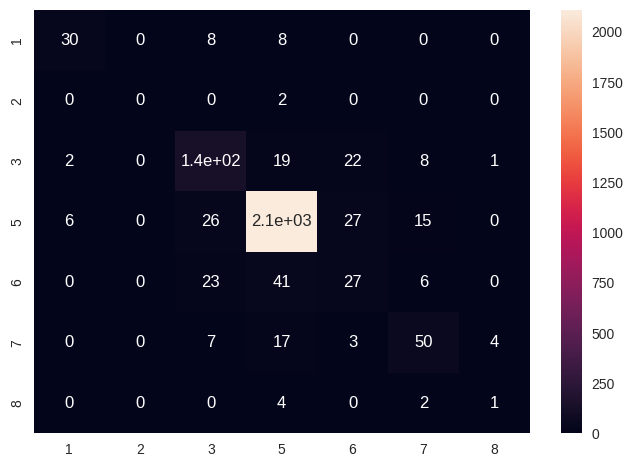

In [ ]:
cof = confusion_matrix(y_testc, y_pred)
labels = [1,2,3,5,6,7,8]
sns.heatmap(cof,annot= True,xticklabels=labels, yticklabels=labels)

In [ ]:
print(classification_report(y_testc, y_pred))

              precision    recall  f1-score   support

         1.0       0.79      0.65      0.71        46
         2.0       0.00      0.00      0.00         2
         3.0       0.69      0.73      0.71       192
         5.0       0.96      0.97      0.96      2183
         6.0       0.34      0.28      0.31        97
         7.0       0.62      0.62      0.62        81
         8.0       0.17      0.14      0.15         7

    accuracy                           0.90      2608
   macro avg       0.51      0.48      0.49      2608
weighted avg       0.90      0.90      0.90      2608



# Compare Models

In [ ]:
models = ['Logistic Regression', 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'Gradient Boosting','Stacking'] #, 'XgBoost'

In [ ]:
scores = [lr_test_acc, knn_test_acc, svc_test_acc, dtc_test_tune_acc, rand_clf_test_acc, ada_test_acc, gb_test_acc,stacking_acc]#, xgb_test_acc

In [ ]:
models = pd.DataFrame({'Model' : models, 'Score' : scores})

In [ ]:
models.sort_values(by = 'Score', ascending = False)

Model     Score
4        Random Forest  0.903758
1                  KNN  0.898562
6    Gradient Boosting  0.888974
3        Decision Tree  0.886481
5            Ada Boost  0.886481
2                  SVC  0.863087
0  Logistic Regression  0.853883
7             Stacking  0.835506

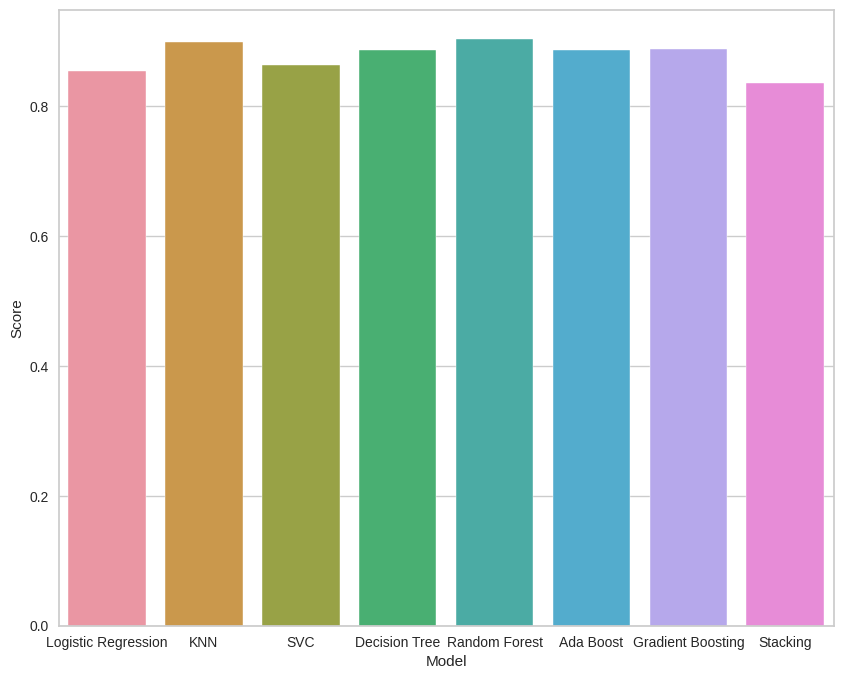

In [ ]:
plt.figure(figsize = (10, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
'''model_params = {

    "random_forest": {'model': RandomForestClassifier(),
                      'params': {'n_estimators': [200, 250, 100, 150, 300]}
                      }
}
'''


'model_params = {\n\n    "random_forest": {\'model\': RandomForestClassifier(),\n                      \'params\': {\'n_estimators\': [200, 250, 100, 150, 300]}\n                      }\n}\n'

In [ ]:
'''scores = []

for model_name, mp in model_params.items():
  model = mp['model']
  params = mp['params']
  random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)
  random_search.fit(X_trainc, y_trainc)
  scores.append({
        "model" : model_name,
        'best_score': random_search.best_score_,
        'best_params' : random_search.best_params_})
mod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df'''

'scores = []\n\nfor model_name, mp in model_params.items():\n  model = mp[\'model\']\n  params = mp[\'params\']\n  random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=5, cv=3)\n  random_search.fit(X_trainc, y_trainc)\n  scores.append({\n        "model" : model_name,\n        \'best_score\': random_search.best_score_,\n        \'best_params\' : random_search.best_params_})\nmod_df = pd.DataFrame(scores,columns = ["model","best_score","best_params"])\nmod_df'

In [ ]:
'''model_params = {
    'decision_tree': {'model': DecisionTreeClassifier(),
            'params' : {
                "criterion" :["gini", "entropy", "log_loss"],
                'splitter': [ 'best'],
                "min_samples_split": [2,4,6],
                'random_state': [36]}
           },
    "AdaBoostDT": {'model' : AdaBoostClassifier(),
                   'params' : {'n_estimators' : [10,50,100,150,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    "AdaBoostRandomForest": {'model' : AdaBoostClassifier(),
                   'params' : {"base_estimator":[RandomForestClassifier()],
                               'n_estimators' : [400,250,300,450,200],
                               'learning_rate':[0.1,0.2,0.3,0.4],
                               "algorithm" : ['SAMME', 'SAMME.R']}
                     },
    'xgboost_classifier' : {'model' : XGBClassifier(),
        'params':{"n_estimators" : [1,30,100,150,200],
                 'learning_rate':[0.1,0.2,0.3,0.4],
                 }
                           }
}'''

'model_params = {\n    \'decision_tree\': {\'model\': DecisionTreeClassifier(),\n            \'params\' : {\n                "criterion" :["gini", "entropy", "log_loss"],\n                \'splitter\': [ \'best\'],\n                "min_samples_split": [2,4,6],\n                \'random_state\': [36]}\n           },\n    "AdaBoostDT": {\'model\' : AdaBoostClassifier(),\n                   \'params\' : {\'n_estimators\' : [10,50,100,150,200],\n                               \'learning_rate\':[0.1,0.2,0.3,0.4],\n                               "algorithm" : [\'SAMME\', \'SAMME.R\']}\n                     },\n    "AdaBoostRandomForest": {\'model\' : AdaBoostClassifier(),\n                   \'params\' : {"base_estimator":[RandomForestClassifier()],\n                               \'n_estimators\' : [400,250,300,450,200],\n                               \'learning_rate\':[0.1,0.2,0.3,0.4],\n                               "algorithm" : [\'SAMME\', \'SAMME.R\']}\n                     },\n    

In [ ]:
'''scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp['params'], cv =10, return_train_score = False)
    clf.fit(Xc, yc)
    scores.append({
        "model" : model_name,
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_})
mod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])
mod_df1'''

'scores = []\n\nfor model_name, mp in model_params.items():\n    clf = GridSearchCV(mp["model"],mp[\'params\'], cv =10, return_train_score = False)\n    clf.fit(Xc, yc)\n    scores.append({\n        "model" : model_name,\n        \'best_score\': clf.best_score_,\n        \'best_params\' : clf.best_params_})\nmod_df1 = pd.DataFrame(scores,columns = ["model","best_score","best_params"])\nmod_df1'

In [ ]:
'''modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)
modeles_df'''

"modeles_df = pd.concat([mod_df,mod_df1]).set_index('model',drop = True)\nmodeles_df"

In [ ]:
'''print('Random Forest Regression')
print("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))
print("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)
print("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))'''

'print(\'Random Forest Regression\')\nprint("Accuracy in training dataset: ", (model_rf.score(x_train, y_train)*100))\nprint("Accuracy in testing dataset: ", model_rf.score(x_test, y_test)*100)\nprint("RMSE value: ", sqrt(mean_squared_error(y_test, y_pred)))'